# Finite state automata

**Question**
- Write DFA to check if given word has `ing` at the end


In [2]:
def q3(s, i):
    print('q3 -> ', end='')
    # Condition to check end of string
    if (i == len(s)):
        print("YES")
        return
    # State transitions  # ANY char -> take to q0
    q0(s, i )

def q2(s, i):
    print('q2 -> ', end='')
    # Condition to check end of string
    if (i == len(s)):
        print("No")
        return
    # State transitions: # IF current char is 'i' -> takes to q1 ELSE REMAIN in same state
    if (s[i] == 'g'):
        q3(s, i + 1)
    else:
        q0(s, i + 1)


def q1(s, i):
    print('q1 -> ', end='')
    # Condition to check end of string
    if (i == len(s)):
        print("No")
        return
    # State transitions: # IF current char is 'n' -> takes to q2 ELSE move to state q0
    # if (s[i] == 'n'):
    if (s[i] == 'n'):
        q2(s, i + 1)
    elif (s[i] == 'i'):
        q1(s, i + 1)
    else:
        q0(s, i + 1)


def q0(s, i):
    print('q0 -> ', end='')
    # Condition to check end of string
    if (i == len(s)):
        print("No")
        return
    # State transitions : # IF current char is 'i' -> takes to q1 ELSE REMAIN in same state
    if (s[i] == 'i'):
        q1(s, i + 1)
    else:
        q0(s, i + 1)


In [3]:
input = "runinging"
q0(input, 0)

q0 -> q0 -> q0 -> q0 -> q1 -> q2 -> q3 -> q0 -> q1 -> q2 -> q3 -> YES


# Using Library

1. OpenFst - C++ library: Very useful if you are planning for the linguistic
analysis of the text - [Learn More](https://www.openfst.org/twiki/bin/view/FST/FstExamples)

2. pynini  - Python library


In [6]:
!pip install pynini

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 MB 1.1 MB/s eta 0:00:0000:0100:03


In [7]:
import pynini


## Recognize plural nouns in English

Let's say we want to recognize plural nouns in English (`cat -> cats, dog -> dogs`).

In [8]:
alphabets = pynini.union(*"abcdefghijklmnopqrstuvwxyz").closure().optimize()
# alphabets

### Rule: plural nouns ending in 's'

In [9]:
plural_s = alphabets + pynini.cross("", "s")

In [10]:
# Example words
cat = pynini.accep("cat")
dog = pynini.accep("dog")

In [11]:
# Compose with plural rule
print((cat @ plural_s).string())  # cats
print((dog @ plural_s).string())  # dogs

cats
dogs


### Rule: plural nouns ending in 'es'

To form the plural of most nouns in English, you add -s or -es to the end of the word. The choice between -s and -es depends on the ending of the singular noun.
- For example, if a word ends in `'s', 'ch', 'sh', 'ss', 'x', or 'z'`, you add -es to make it plural.
- This rule applies to words like "church" (churches), "box" (boxes), and "bus" (buses).

Additionally, words ending in `y` can be a bit more complex. If the `'y'` is preceded by a consonant, you typically change the `'y'` to `'i'` and add `-es`, as in "baby" (babies).
-

```
# This is formatted as code
```

However, if the 'y' is preceded by a vowel, you simply add -s, as in "boy" (boys).

In [ ]:
plural_es = alphabets + pynini.cross("", "es")
# plural_es

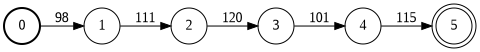

In [ ]:
boxes = pynini.accep("boxes")
boxes

## Building a Morphological Analyzer

Define the rules

In [ ]:
plural_suffix = pynini.cross("s", "+PL")
singular = pynini.cross("", "+SG")

Define morphemes

In [ ]:
root = pynini.union("cat", "dog")

Define analyzer: `root + suffix mapping`

In [ ]:
analyzer = (
    (root + "s") @ (root + plural_suffix)
) | (
    root @ (root + singular)
)

In [ ]:
analyzer.draw("analyzer.dot", portrait=True)

In [ ]:
!dot -Tpng analyzer.dot -o analyzer.png

In [ ]:
from pynini.lib import rewrite

print(rewrite.top_rewrite("cats", analyzer))  # cat+PL
print(rewrite.top_rewrite("dog", analyzer))   # dog+SG

cat+PL
dog+SG


## Nepali Noun Analysis

In [ ]:
import pynini
from pynini.lib import rewrite

# Define Nepali letters (simple Devanagari subset)
sigma = pynini.union(
    *"कखगघङचछजझञटठडढणतथदधनपफबभमयरलवशषसहािीुूेैोौंःृॄ"
).closure().optimize()


Define noun roots

In [ ]:
nouns = pynini.union(
    "किताब",
    "केटा"
)

Suffix mapping

In [ ]:
plural_suffix = pynini.cross("हरु", "+PL")
singular = pynini.cross("", "+SG")

In [ ]:
# Analyzer FST
noun_analyzer = (
    (nouns + "हरु") @ (nouns + plural_suffix)
) | (
    nouns @ (nouns + singular)
)

In [ ]:
# Test analyzer
print(rewrite.top_rewrite("किताबहरु", noun_analyzer))  # किताब+PL
print(rewrite.top_rewrite("केटा", noun_analyzer))      # केटा+SG

किताब+PL
केटा+SG


### Generator

In [ ]:
import pynini
from pynini.lib import rewrite

# Define lexicon
nouns = ["किताब", "केटा", "घर"]

# Build analyzer with cross: surface → analysis
noun_analyzer = pynini.union(
    *[pynini.cross(noun + "हरु", noun + "+PL") for noun in nouns],
    *[pynini.cross(noun, noun + "+SG") for noun in nouns]
)

# Generator: invert the analyzer
generator = pynini.invert(noun_analyzer)

In [ ]:
# analyzer
print(rewrite.top_rewrite("किताबहरु", noun_analyzer))  # किताब+PL
print(rewrite.top_rewrite("केटा", noun_analyzer))      # केटा+SG

किताब+PL
केटा+SG


In [ ]:
# generator
print(rewrite.top_rewrite("किताब+PL", generator))      # किताबहरु
print(rewrite.top_rewrite("केटा+SG", generator))       # केटा

किताबहरु
केटा


## Assignment1

Make a Nepali Rule based morphological analyzer that include
- larger lexicon
- Rules for the case markers: को, का, कि, मो, मा, etc.
- Rules for the noun


Sample dataset: NNC: Nepali National Corpus

References:
- http://www.bhashasanchar.org:80/pdfs/nelralec-wp-tagset.pdf
- https://www.lancaster.ac.uk/staff/hardiea/nepali/postag.php
